# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- ipywidgets and ipykernel if necessary
- Starter Code was tested on Python 3.11.5

In [158]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm


# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [90]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    print("FourRooms")
    def __init__(self):
        print("FourRooms")
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        # CODE HERE: implement the stochastic dynamics as described in Q1. 
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.
        next_state = None

        if state == self.goal_state:
            return [0, 0], 0


        perpendicular_actions = self.get_perpindicular_actions(act)
        
        random = np.random.rand()


        if random < 0.8:
            next_state = self.take_action(state, act)
        elif random < 0.9:
            next_state = self.take_action(state, perpendicular_actions[0])    
        else:
            next_state = self.take_action(state, perpendicular_actions[1])

        
        # CODE HERE: compute the reward based on the resulting state
        if next_state == self.goal_state:
            reward = 1
        else:
            reward = 0
        

        # return the current state, reward
        return next_state, reward
        
    def get_perpindicular_actions(self, act):
        if act == "UP" or act == "DOWN":
            return ["LEFT", "RIGHT"]
        else:
            return ["UP", "DOWN"]

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

FourRooms


In [91]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [159]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 40

    # create a loop
    for t in range(time_step):
        
        # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
        action = None
        inp = input("Enter an action using 'w', 's', 'a', 'd': ")
        if inp == "w":
            action = "UP"
        elif inp == "s":
            action = "DOWN"
        elif inp == "a":
            action = "LEFT"
        elif inp == "d":
            action = "RIGHT"
        else:
            print("Invalid input. Please type 'w', 's', 'a', or 'd'.")
            continue
        
        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        next_state, reward = None, None
        next_state, reward = env.step(state, action)
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

FourRooms
Step = 0, state = [0, 0], action = UP, next state = [0, 1], reward = 0
Step = 1, state = [0, 1], action = UP, next state = [0, 2], reward = 0
Step = 2, state = [0, 2], action = UP, next state = [0, 3], reward = 0
Step = 3, state = [0, 3], action = UP, next state = [0, 4], reward = 0
Step = 4, state = [0, 4], action = UP, next state = [0, 4], reward = 0
Step = 5, state = [0, 4], action = RIGHT, next state = [1, 4], reward = 0
Step = 6, state = [1, 4], action = UP, next state = [1, 5], reward = 0
Step = 7, state = [1, 5], action = UP, next state = [1, 5], reward = 0
Step = 8, state = [1, 5], action = UP, next state = [1, 5], reward = 0
Step = 9, state = [1, 5], action = UP, next state = [1, 5], reward = 0
Step = 10, state = [1, 5], action = UP, next state = [1, 6], reward = 0
Step = 11, state = [1, 6], action = LEFT, next state = [0, 6], reward = 0
Step = 12, state = [0, 6], action = LEFT, next state = [0, 6], reward = 0
Step = 13, state = [0, 6], action = LEFT, next state = [0

# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

### Written Section: 
I beleive that the random policy is significantly worse than the manual policy, as the random actions may never reach the end. In contrast, when I manualy play the 4 walls game I can guide the agent to the reward state each attempt. For my random function to reach one reward point, it takes on average of 10 runs around 1500 steps to reach the reward. By doing the process manually, I can consistently reach the reward state in under 30 steps. My manual actions can keep the agent moving closer towards the reward and account for stochasticity because I know the path to the reward square. The random policy cannot adjust for stochasticity as it simply takes a random action each step, regardless of where the agent is in relation to the reward state.

FourRooms


Run trial: 100%|██████████| 10/10 [00:01<00:00,  6.51it/s]


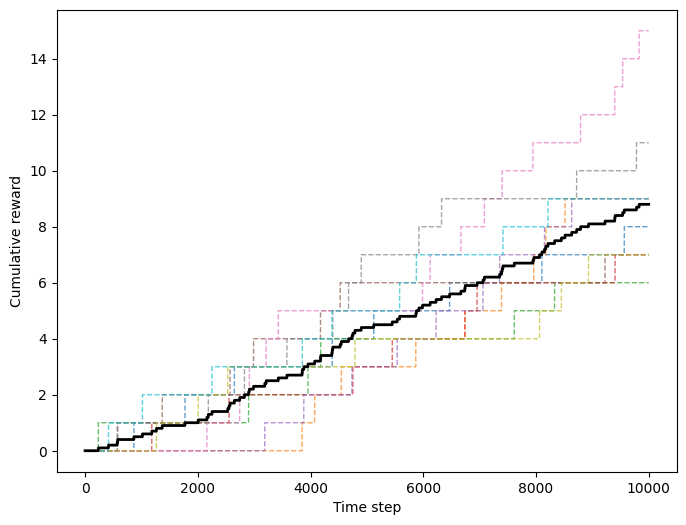

In [137]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            action = None
            random = np.random.rand()
            if random < 0.25:
                action = "UP"
            elif random < 0.5:
                action = "DOWN"
            elif random < 0.75:
                action = "LEFT"
            else:
                action = "RIGHT"
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = None, None
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

# 4 Implement better & worse policies against the Random Policy

### Worse Policy
This strategy simply goes either right or up every time. Because the steps are stochastic, this should eventually reach the goal state but significantly slower than the random function. This random function is limited to only up and down, and therefore it gets stuck on corners and walls more than the true random version. This policy reaches around 3 reward points after 10,000 steps, compared to the random poicy that reaches around 8 in the same number of steps. The only way for this policy to move down or left is because of stochastic nature of the step function, making it very difficult for the agent to reach the reward state

FourRooms


Run trial: 100%|██████████| 10/10 [00:01<00:00,  6.17it/s]


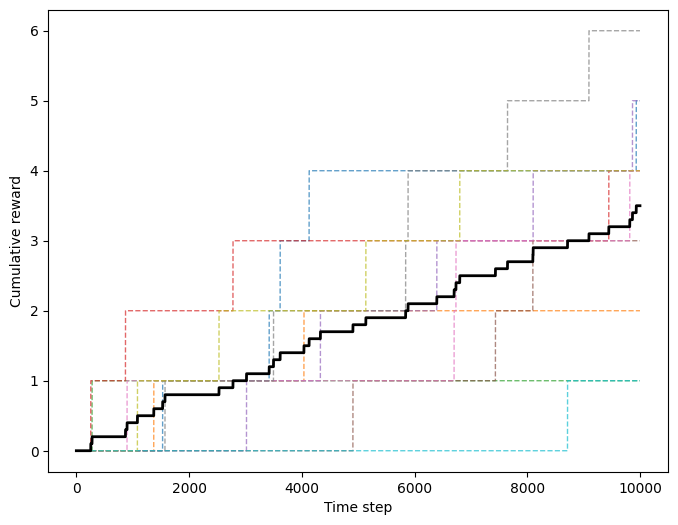

In [141]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    worse_rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action
            random = np.random.rand()
            if random < 0.5:
                action = "RIGHT"
            else:
                action = "UP"
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        worse_rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(worse_rewards_list)

### Better policy

This policy works by trying to keep the agent on the correct path to consistently reach the reward. With a series of if statments, I tell the agent to update its state based off the move that would put it closer to the reward state and through the path to the reward. This preforms significantly better than the random policy, and after 10,000 steps it consistently reaches a reward of 150 points. 

FourRooms


Run trial: 100%|██████████| 10/10 [00:01<00:00,  6.28it/s]


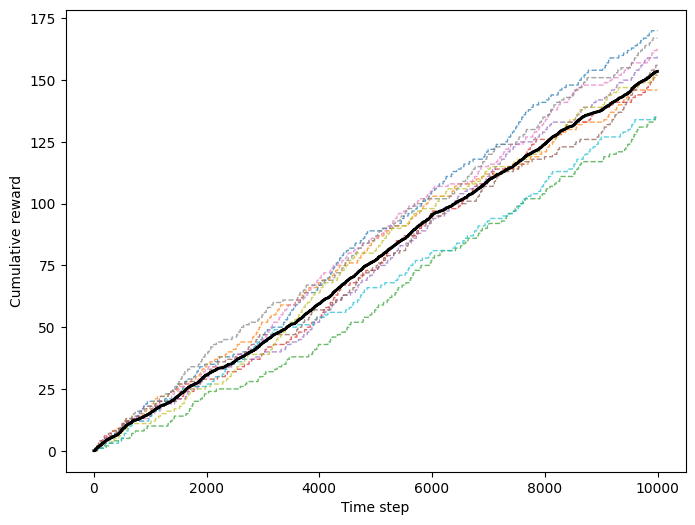

In [143]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    better_rewards_list = []
    worse_rewards_list = []

    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            random = np.random.rand()
# ###
#                                     10    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#                                     9     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#                                     8     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                     7     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#                                     6     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#                                     5     [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
#                                     4     [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
#                                     3     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#                                     2     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#                                     1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                                     0     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

#    #                                       0  1  2  3  4  5  6  7  8  9  10   
#    ###

        
            # CODE HERE: please implement a policy that is better than the random policy.
            # It should takes in the current state and output an action
            
            if state[0] < 1 and state[1] < 6:
                action = "RIGHT"
            elif state[0] == 1 and state[1] < 6:
                action = "UP"
            elif state[0] > 2 and state[1] < 6:
                action = "LEFT"
            elif state[1] >= 6 and state[1] < 8:
                action = "UP"
            elif state[0] < 5 and state[1] > 8:
                action = "DOWN"
            elif state[0] < 10 and state[1] == 8:
                action = "RIGHT"
            else:
                action = "UP"

            
              
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        better_rewards_list.append(reward_per_trial)
        
    plot_func(better_rewards_list)

In [155]:
def plot_func_multiple(res_list1, res_list2, res_list3):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list1:
        plt.plot(list(range(len(res_list1[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list1).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list1[0]))), mean_reward, linestyle="-", linewidth=2, color="g")

    for re in res_list2:
        plt.plot(list(range(len(res_list2[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list2).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list2[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    for re in res_list3:
        plt.plot(list(range(len(res_list3[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list3).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list3[0]))), mean_reward, linestyle="-", linewidth=2, color="r")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

### All graphed together
Here I ran all policies and plotted them on a graph togehter. This visualizes how much better the the better policy is than the random, and how worse the worse policy is. 

FourRooms


Run trial: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


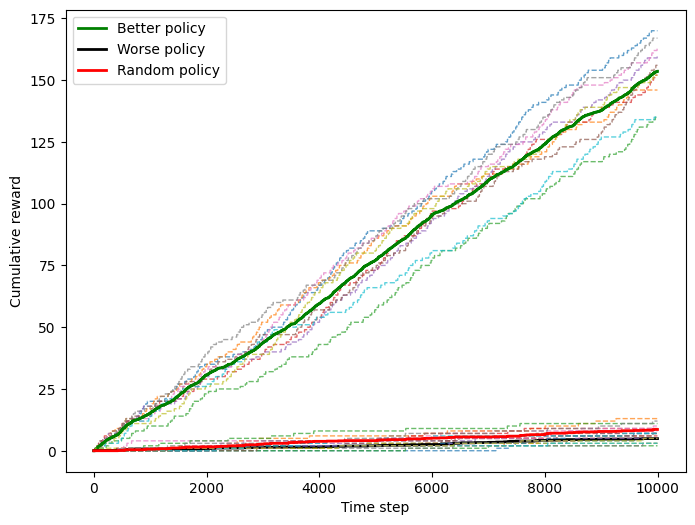

In [156]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    better_rewards_list = []
    worse_rewards_list = []

    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            random = np.random.rand()
         
            # CODE HERE: please implement a policy that is better than the random policy.
            # It should takes in the current state and output an action
            
            if state[0] < 1 and state[1] < 6:
                action = "RIGHT"
            elif state[0] == 1 and state[1] < 6:
                action = "UP"
            elif state[0] > 2 and state[1] < 6:
                action = "LEFT"
            elif state[1] >= 6 and state[1] < 8:
                action = "UP"
            elif state[0] < 5 and state[1] > 8:
                action = "DOWN"
            elif state[0] < 10 and state[1] == 8:
                action = "RIGHT"
            else:
                action = "UP"

        
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        better_rewards_list.append(reward_per_trial)
        
# run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action
            random = np.random.rand()
            if random < 0.5:
                action = "RIGHT"
            else:
                action = "UP"
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        worse_rewards_list.append(reward_per_trial)

    rewards_list = []
    
    # run experiment

    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            action = None
            random = np.random.rand()
            if random < 0.25:
                action = "UP"
            elif random < 0.5:
                action = "DOWN"
            elif random < 0.75:
                action = "LEFT"
            else:
                action = "RIGHT"
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = None, None
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        

def plot_func_multiple(res_list1, res_list2, res_list3):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list1:
        plt.plot(list(range(len(res_list1[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list1).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list1[0]))), mean_reward, linestyle="-", linewidth=2, color="g", label="Better policy")

    for re in res_list2:
        plt.plot(list(range(len(res_list2[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list2).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list2[0]))), mean_reward, linestyle="-", linewidth=2, color="k", label="Worse policy")

    for re in res_list3:
        plt.plot(list(range(len(res_list3[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list3).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list3[0]))), mean_reward, linestyle="-", linewidth=2, color="r", label="Random policy")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.legend()
    plt.show()
# PLOT THE RESULTS
plot_func_multiple(better_rewards_list, worse_rewards_list, rewards_list)   
# plot_func(worse_rewards_list)